In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from statsmodels.tsa.stattools import adfuller
from pandas import Series

In [2]:
data = pd.read_csv('/Users/marcos/Documents/00_Git_Projetos/SeriesTemporais/SeriesTemporais_Python/Download/Dados/AirPassengers.csv',
                   parse_dates=['Month'], index_col='Month') #, date_parser=dateparse)

In [3]:
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


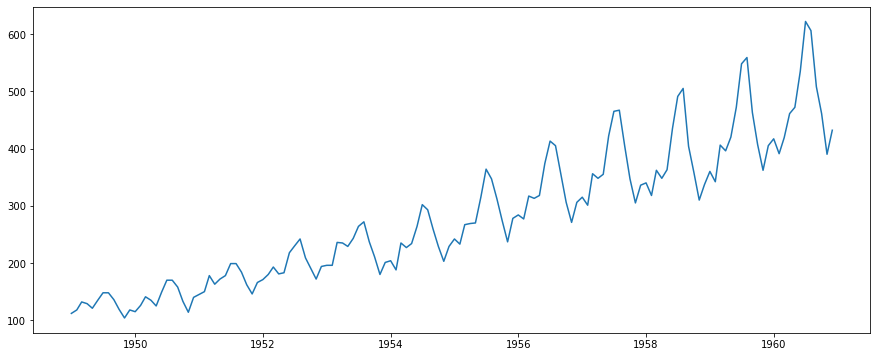

In [4]:
plt.plot(data)

In [5]:
y = data['#Passengers']

In [20]:
def adf_test(y):
    print('Resultado do Teste Dickey-Fuller:')
    dftest = adfuller(y, autolag="AIC")
    dfoutput = pd.Series(dftest[0:4], index=['Teste', 'Valor p', '# de lags', '# de observações'])
    for key, value in dftest[4].items():
        dfoutput['Valor Crítico ({})'.format(key)] = value
    print(dfoutput)

In [21]:
adf_test(y)

Resultado do Teste Dickey-Fuller:
Teste                    0.815369
Valor p                  0.991880
# de lags               13.000000
# de observações       130.000000
Valor Crítico (1%)      -3.481682
Valor Crítico (5%)      -2.884042
Valor Crítico (10%)     -2.578770
dtype: float64


#### Aplicando a Diferenciação

In [24]:
y_diff = np.diff(y)

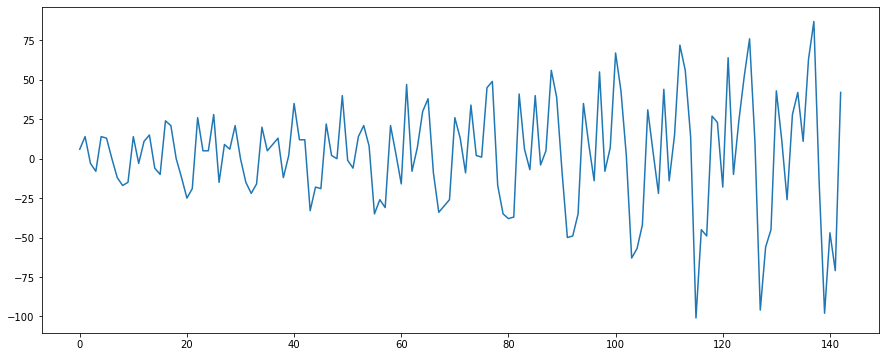

In [25]:
plt.plot(y_diff)

In [26]:
adf_test(y_diff)

Resultado do Teste Dickey-Fuller:
Teste                   -2.829267
Valor p                  0.054213
# de lags               12.000000
# de observações       130.000000
Valor Crítico (1%)      -3.481682
Valor Crítico (5%)      -2.884042
Valor Crítico (10%)     -2.578770
dtype: float64


#### Aplicando a Diferenciação de Segunda Ordem

In [28]:
y_diff2 = np.diff(y_diff)

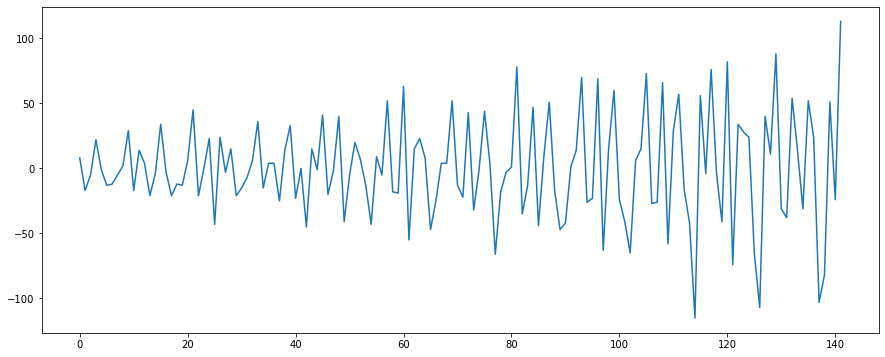

In [30]:
plt.plot(y_diff2)

In [31]:
adf_test(y_diff2)

Resultado do Teste Dickey-Fuller:
Teste                 -1.638423e+01
Valor p                2.732892e-29
# de lags              1.100000e+01
# de observações       1.300000e+02
Valor Crítico (1%)    -3.481682e+00
Valor Crítico (5%)    -2.884042e+00
Valor Crítico (10%)   -2.578770e+00
dtype: float64


#### com a aplicação da Diferenciação de Segunda Ordem temos o valor de "p" abaixo de 0.005